## Retina Net
object detection in Aerial Images is challengin and intersting problem It will be very useful to have models that can extract valuable information from Geo data. Retina Net is the most **famous single stage detector**

## Retina Net
 
RetinaNet is a single stage detector that uses Feature Pyramid Network (FPN) and Focal loss for training.
RetinaNetis a state-of-the-art detector presented by Lin, Goyal et al. in2017. In order to understand what RetinaNet is and does we
can decompose this nework in 3 parts:
<p>a) A backbone network built on top of ResNet called ”Feature
Pyramid Net” and is what computes the convolutional feature
maps of an entire image.</p>
<p>b) A subnetwork that uses the backbone’s output to perform
the object classification.</p>
<p>c) A subnetwork that uses the backbone’s output and is
responsible for performing the bounding box.</p>

![alt text](images/retina.png "Title")

Feature pyramid network is a structure for multiscale object detectiont combines low-resolution, semantically strong features with high-resolution, semantically weak features via a top-down pathway and lateral connections. The net result is that it produces feature maps of different scale on multiple levels in the network which helps with both classifier and regressor networks.

The Focal Loss is designed to address the single-stage object detection problems with the imbalance where there is a very large number of possible background classes and just a few foreground classes. Easily classified negatives comprise the majority of the loss and dominate the gradient. While alpha balances the importance of positive/negative examples, it does not differentiate between easy/hard examples. So the authors have reshaped the cross entropy function and come up with focal loss as mentioned below
\begin{equation}
F L(p t)=-\left(1-p_{t}\right)^{Y} * \alpha_{t} * \log (p t)
\end{equation}

<p>Here gamma is called the focusing param and alpha is called the balancing param.</p>
gamma =2 and alpha =0.25 works best and in general alpha should be decreased slightly as gamma is increased.

## Downloding the repo for the retinanet

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git


In [ ]:
# change to keras-retina dir

In [1]:
%cd keras-retinanet/



/home/bhuwan/Desktop/retina-net/keras-retinanet


In [ ]:
# to install all the required content 
!pip install . --user

In [2]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


## Making the dataset

We start by creating annotations for the training and validation dataset, using the tool **LabelImg**. This excellent annotation tool let you quickly annotate the bounding boxes of the objects to train the machine learning model.
https://github.com/tzutalin/labelImg
![alt text](images/labelimg.png "Title")



## Annotations format

The CSV file with annotations should contain one annotation per line. Images with multiple bounding boxes should use one row per bounding box. Note that indexing for pixel values starts at 0. The expected format of each line is:

**path/to/image.jpg,x1,y1,x2,y2,class_name**



In [2]:
# import the required package

import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas as pd

### creating an annotation for training the model

In [ ]:

ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

annotations = []
classes = set([])
DATASET_DIR="/home/bhuwan/Desktop/retina-net/data/"
for xml_file in [f for f in os.listdir(DATASET_DIR) if f.endswith(".xml")]:
  tree = ET.parse(os.path.join(DATASET_DIR, xml_file))
  root = tree.getroot()

  file_name = None

  for elem in root:
    if elem.tag == 'filename':
      file_name = os.path.join(DATASET_DIR, elem.text)

    if elem.tag == 'object':
      obj_name = None
      coords = []
      for subelem in elem:
        if subelem.tag == 'name':
          obj_name = subelem.text
        if subelem.tag == 'bndbox':
          for subsubelem in subelem:
            coords.append(subsubelem.text)
      item = [file_name] + coords + [obj_name]
      annotations.append(item)
      classes.add(obj_name)

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes):
    f.write('{},{}\n'.format(line,i))

In [ ]:

df=pd.read_csv("/home/bhuwan/Desktop/retina-net/keras-retinanet/annotations.csv")
df.head()


# Debugging

Creating your own dataset does not always work out of the box. There is a **debug.py** tool to help find the most common mistakes.

Particularly helpful is the --annotations flag which displays your annotations on the images from your dataset. Annotations are colored in green when there are anchors available and colored in red when there are no anchors available. If an annotation doesn't have anchors available, it means it won't contribute to training. It is normal for a small amount of annotations to show up in red, but if most or all annotations are red there is cause for concern. The most common issues are that the annotations are too small or too oddly shaped (stretched out).


In [6]:
! python keras_retinanet/bin/debug.py --annotations csv annotations.csv classes.csv

Using TensorFlow backend.


## Anchor Boxes and optimization 

Anchor boxes were first introduced in Faster RCNN paper and later became a common element in all the following papers like yolov2, ssd and RetinaNet. Previously selective search and edge boxes used to generate region proposals of various sizes and shapes depending on the objects in the image, with standard convolutions it is highly impossible to generate region proposals of varied shapes, so anchor boxes comes to our rescue.


In [ ]:
!python /home/bhuwan//Desktop/retina-net/anchor-optimization-master/optimize_anchors.py "/home/bhuwan/Desktop/retina-net/keras-retinanet/annotations.csv" --ratios=5 --no-resize --include-stride

In [ ]:
# Training without the pretrained weight

In [ ]:
#! python keras_retinanet/bin/train.py  --batch-size 8 --steps 1000 --epochs 100 --snapshot-path snapshot/ --tensorboard-dir logs/ csv annotations.csv classes.csv

In [ ]:
# training with the pretrained weight

In [ ]:
!keras_retinanet/bin/train.py --weights
snapshots/resnet50_coco_best_v2.1.0.h5  --config config.ini
csv train_annotations.csv labels.csv --val-annotations
val_annotations.csv

In [1]:

%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time



Using TensorFlow backend.


# model Inference

In [6]:
#!keras_retinanet/bin/convert_model.py snapshots/resnet50_csv_10.h5 snapshots/resnet50_csv_12_inference.h5 


In [ ]:
#model_path = os.path.join('snapshot', sorted(os.listdir('snapshot'), reverse=True)[0])
#print(model_path)
# load retinanet model
model = models.load_model('/home/bhuwan/Desktop/retina-net/keras-retinanet/snapshots/resnet50_coco_best_v2.1.0.h5', backbone_name='resnet50')


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [7]:
model = models.convert_model(model)


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [8]:
labels_to_names={0:"crossroad",1:"no"}

In [9]:
def img_inference(img_path):
    image = read_image_bgr(img_path)

  # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

  # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

  # correct for image scale
    boxes /= scale

  # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can breakimg_inference("/home/bhuwan/Downloads/52143.png")
        print(label,score)
        if score < 0.8:
            break
      
    
        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()
    

processing time:  2.5120553970336914
1 0.9998441
1 0.9996154
1 0.06141016


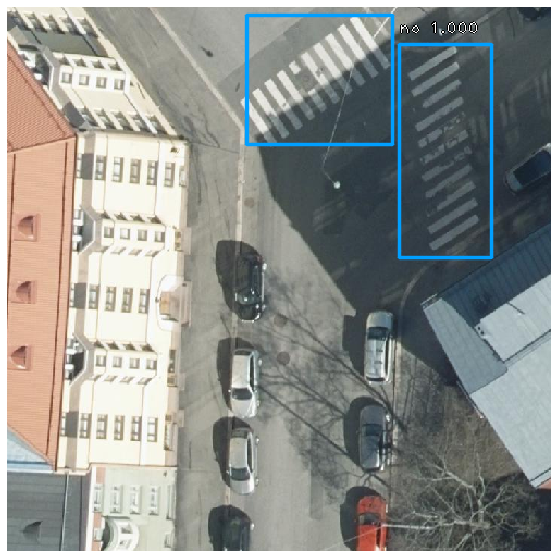

In [10]:
%matplotlib inline
img_inference("/home/bhuwan/Desktop/retina-net/data/train_336.png")

In [4]:
from keras_retinanet.bin.train import create_models
from keras_retinanet.models import backbone,convert_model
from keras_retinanet.utils.config import read_config_file,parse_anchor_parameters

In [4]:
! python keras-retinanet/keras_retinanet/bin/evaluate.py csv  keras-retinanet/annotations.csv keras-retinanet/classes.csv keras-retinanet/snapshot/resnet50_csv_100.h5 --convert-model

Using TensorFlow backend.
Loading model, this may take a second...
2020-01-19 16:54:19.933612: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-01-19 16:54:19.954672: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1006] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-01-19 16:54:19.954937: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: GeForce RTX 2080 Ti major: 7 minor: 5 memoryClockRate(GHz): 1.65
pciBusID: 0000:01:00.0
2020-01-19 16:54:19.955040: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-01-19 16:54:19.955662: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-01-19 16:54:19.956223: I tensorflow/stream_executor/platform/d

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-181.01933,  -90.50967,  181.01933,   90.50967],
       [-228.07008, -114.03504,  228.07008,  114.03504],
       [-287.35028, -143.67514,  287.35028,  143.67514],
       [-128.     , -128.     ,  128.     ,  128.     ],
       [-161.2699 , -161.2699 ,  161.2699 ,  161.2699 ],
       [-203.18733, -203.18733,  203.18733,  203.18733],
       [ -90.50967, -181.01933,   90.50967,  181.01933],
       [-114.03504, -228.07008,  114.03504,  228.07008],
       [-143.67514, -287.35028,  143.67514,  287.35028]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-362.03867, -181.01933,  362.03867,  181.01933],
       [-456.14017, -228.07008,  456.14017,  228.07008],
       [-574.70056, -287.35028,  574.70056,  287.35028],
       [-256.     , -256.     ,  256.     ,  256.     ],
       [-322.5398 , -322.5398 ,  322.5398 ,  322.5398 ],
       [-406.37466, -406.37466,  406.